In [70]:
import numpy as np
np.random.seed(1337)
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import c
from keras.losses import categorical_crossentropy

import tensorflow as tf

from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ece657a-w20-asg3-part2/train.csv
/kaggle/input/ece657a-w20-asg3-part2/testX.csv


In [71]:
test=pd.read_csv("../input/ece657a-w20-asg3-part2/testX.csv")
train=pd.read_csv("../input/ece657a-w20-asg3-part2/train.csv")

In [72]:
train

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,69995,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,69996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,69997,4,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,69998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# Reshaping the dataset into 28*28-- 

In [74]:
df_x = train.iloc[:,2:].values.reshape(len(train),28,28,1)
#Storing the labels in y
y = train.iloc[:,1].values

In [75]:
df_x.shape,y.shape

((60000, 28, 28, 1), (60000,))

In [76]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

# categorical labels--

In [77]:
#Converting labels to categorical features
df_y = keras.utils.to_categorical(y,num_classes=5)

In [78]:
df_y.shape,df_x.shape

((60000, 5), (60000, 28, 28, 1))

In [79]:
df_x = np.array(df_x)
df_y = np.array(df_y)

In [80]:
df_y.shape,df_x.shape

((60000, 5), (60000, 28, 28, 1))

### we are done with preprocessing our data.

# Splitting into train and val set--

In [81]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=42)

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 5), (12000, 5))

# Normalizing the dataset--

In [83]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#rescaling it between 0 to 1
x_train /=255
x_test /=255

# Preprocessing the real test data--

In [84]:
# for test data

#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test.iloc[:,1:].values.reshape(len(test),28,28,1)
df_x_test=df_x_test.astype('float32')
#rescaling it between 0 to 1
df_x_test /=255

In [85]:
df_x_test.shape

(10000, 28, 28, 1)

# MODEL 1------ Adam() | BS: 32 | Epoch: 50   

In [86]:

    
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(5, activation = "softmax"))


model.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [87]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)         

In [88]:
import timeit
start=timeit.default_timer()

a=model.fit(x_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(x_test,y_test),shuffle=False)

stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 267us/step - loss: 0.5965 - accuracy: 0.7506 - val_loss: 0.4034 - val_accuracy: 0.8378
Epoch 2/50
48000/48000 [==============================] - 12s 255us/step - loss: 0.4312 - accuracy: 0.8238 - val_loss: 0.3600 - val_accuracy: 0.8535
Epoch 3/50
48000/48000 [==============================] - 13s 263us/step - loss: 0.3812 - accuracy: 0.8443 - val_loss: 0.3291 - val_accuracy: 0.8658
Epoch 4/50
48000/48000 [==============================] - 13s 278us/step - loss: 0.3545 - accuracy: 0.8558 - val_loss: 0.3193 - val_accuracy: 0.8692
Epoch 5/50
48000/48000 [==============================] - 12s 257us/step - loss: 0.3346 - accuracy: 0.8646 - val_loss: 0.3125 - val_accuracy: 0.8702
Epoch 6/50
48000/48000 [==============================] - 12s 258us/step - loss: 0.3176 - accuracy: 0.8696 - val_loss: 0.3014 - val_accuracy: 0.8733
Epoch 7/50
48000/48000 [==============================] 

# RESULT -- 
## Epoch 50 | BS: 32 | val acc: 88.80% | val loss: 0.3498 |Time Taken 626.66

In [90]:
print('Time Taken',stop-start)

Time Taken 626.6638785159957


# PLOTS

In [91]:
a.history

{'val_loss': [0.4033724909623464,
  0.3599606087207794,
  0.32914095296462376,
  0.31929966511329017,
  0.312544486562411,
  0.3013599292635918,
  0.30756616351008415,
  0.2992435777882735,
  0.2817758245269458,
  0.2941706682840983,
  0.28739022960265476,
  0.30096260717511175,
  0.39122702888647715,
  0.3146239177584648,
  0.40916743836800257,
  0.3491276902159055,
  0.45506616806983946,
  0.42650965321063994,
  0.4063954245050748,
  0.3702005906601747,
  0.3703420192102591,
  0.3150184295872847,
  0.32883940237760545,
  0.3642073835134506,
  0.4325282093882561,
  0.30827444048225877,
  0.34311835634708404,
  0.3139721905142069,
  0.3836490850249926,
  0.33600772920250893,
  0.3119103609919548,
  0.29678576994935674,
  0.31198796155055364,
  0.31762824766834574,
  0.3261081506510576,
  0.32265786701440813,
  0.34918424412111443,
  0.3608799565633138,
  0.32303179213404654,
  0.3374923227379719,
  0.3516176373461882,
  0.3220368155092001,
  0.3482756202965975,
  0.3484653647542,
  0.4

In [92]:
print(a.history['accuracy'])
print(a.history['loss'])
print(a.history['val_accuracy'])
print(a.history['val_loss'])

[0.7506458, 0.8238125, 0.8443125, 0.8558125, 0.864625, 0.8695625, 0.8765625, 0.8789167, 0.88489586, 0.8886458, 0.8918125, 0.89308333, 0.8979375, 0.90008336, 0.90389585, 0.90520835, 0.90683335, 0.91041666, 0.91085416, 0.9115625, 0.91202086, 0.9132917, 0.914625, 0.91641665, 0.91820836, 0.9187292, 0.9179583, 0.922375, 0.9212292, 0.92175, 0.92485416, 0.92560416, 0.92560416, 0.9253542, 0.9270833, 0.926125, 0.9266875, 0.92920834, 0.92833334, 0.92995834, 0.9335625, 0.93127084, 0.9335625, 0.933, 0.93366665, 0.9313958, 0.9366875, 0.9354375, 0.9348125, 0.93452084]
[0.5965039790868759, 0.43118506436546644, 0.381224333802859, 0.3544850451797247, 0.3346409013221661, 0.3176141997476419, 0.3002493300090234, 0.2956881745730837, 0.278702484463652, 0.27246057012925545, 0.26463235334058605, 0.2605825710222125, 0.24956830432265997, 0.2441581368247668, 0.23611978941162426, 0.23472770633051793, 0.2275968026816845, 0.22289038225263358, 0.21953363719085853, 0.2175585247601072, 0.2183501423348983, 0.2095118104

### Making dataframe

In [93]:
train_acc_1=a.history['accuracy']
train_loss_1=a.history['loss']
val_acc_1=a.history['val_accuracy']
val_loss_1=a.history['val_loss']

num=len(a.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [94]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [95]:
history_df1=pd.DataFrame(eplist,columns = ['Epoch'])
history_df1['train_acc']=pd.DataFrame(train_acc_1)

In [96]:
history_df1['train_loss']=pd.DataFrame(train_loss_1)
history_df1['val_acc']=pd.DataFrame(val_acc_1)
history_df1['val_loss']=pd.DataFrame(val_loss_1)

In [97]:
history_df1

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.750646,0.596504,0.837750,0.403372
1,2,0.823812,0.431185,0.853500,0.359961
2,3,0.844312,0.381224,0.865750,0.329141
3,4,0.855812,0.354485,0.869250,0.319300
4,5,0.864625,0.334641,0.870167,0.312544
5,6,0.869563,0.317614,0.873333,0.301360
6,7,0.876562,0.300249,0.874083,0.307566
7,8,0.878917,0.295688,0.877083,0.299244
8,9,0.884896,0.278702,0.884250,0.281776
9,10,0.888646,0.272461,0.880583,0.294171


### Epoch vs Train loss

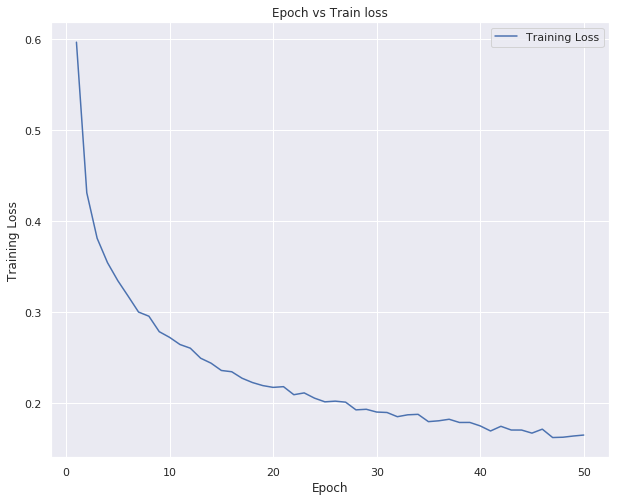

In [98]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df1)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

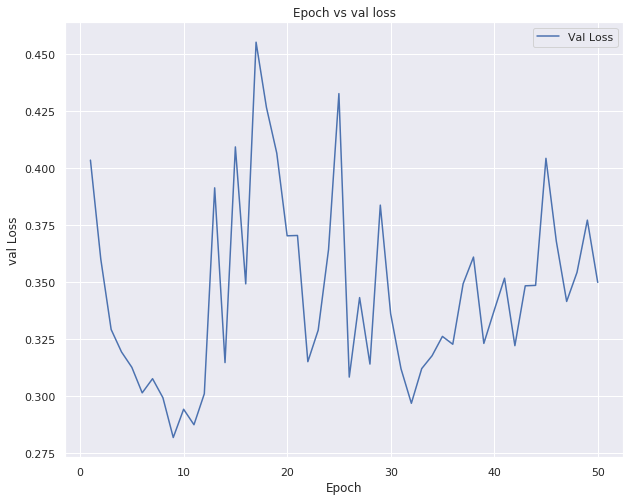

In [99]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df1)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

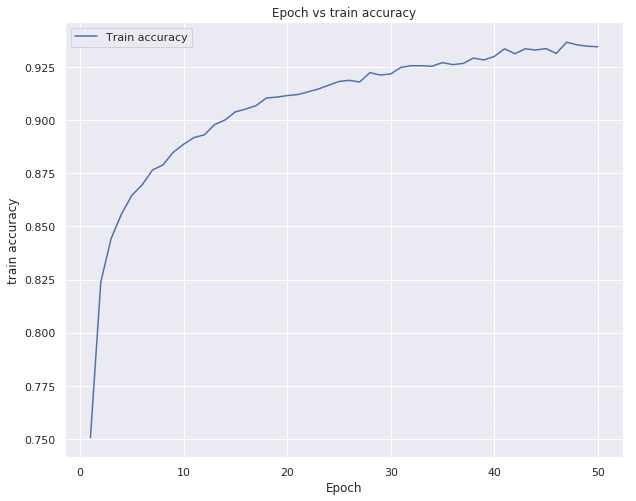

In [100]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df1)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

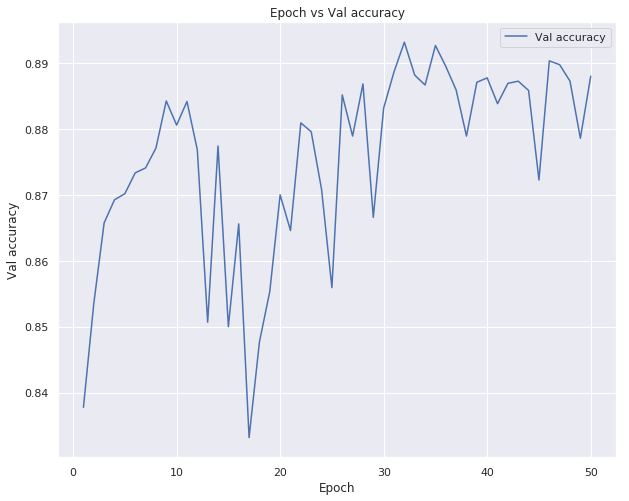

In [101]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df1)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

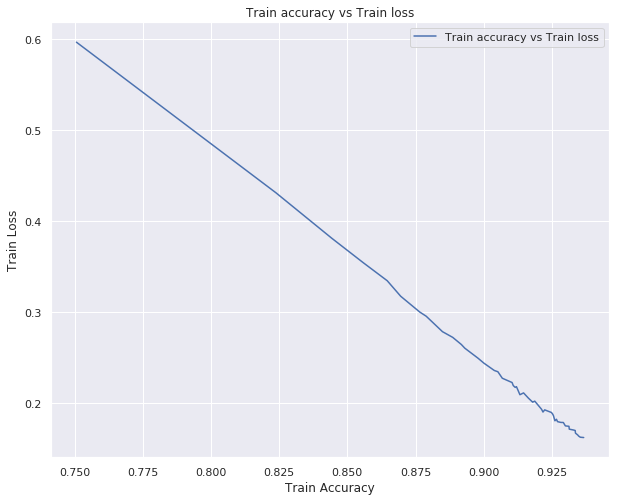

In [102]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df1)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

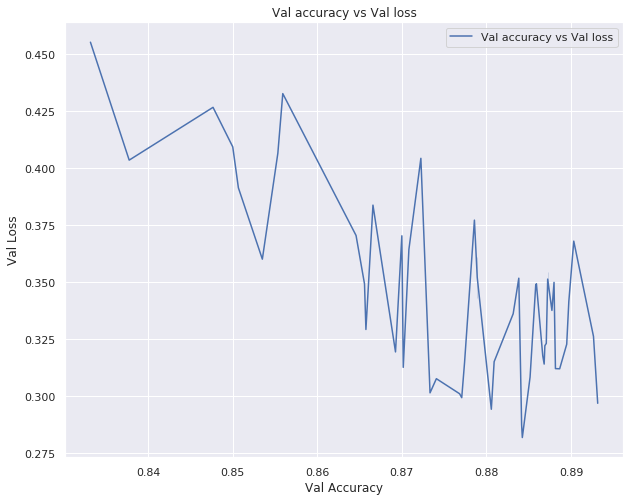

In [103]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df1)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled test data-- 

In [104]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [105]:
df_x_test.shape

(10000, 28, 28, 1)

In [106]:
target_classes = model.predict_classes(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 67us/step


In [107]:
target_classes=pd.DataFrame(target_classes)

In [108]:
target_classes

,0
0,3
1,4
2,0
3,1
4,0
...,...
9995,1
9996,1
9997,3
9998,2


In [109]:

target_classes=pd.DataFrame.reset_index(target_classes)
target_classes.columns=['Id','Label']

In [110]:

filename = 'submission_cnn_1.csv'
target_classes.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_cnn_1.csv


# MODEL 2------ Adam() | BS: 32 | Epoch: 50 | callback | learning_rate_reduction


In [111]:

    
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(5, activation = "softmax"))

# Set a learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



model.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [112]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)         

In [113]:
import timeit
start=timeit.default_timer()

a=model.fit(x_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 265us/step - loss: 0.5875 - accuracy: 0.7532 - val_loss: 0.4049 - val_accuracy: 0.8328
Epoch 2/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.4230 - accuracy: 0.8284 - val_loss: 0.3623 - val_accuracy: 0.8525
Epoch 3/50
48000/48000 [==============================] - 12s 252us/step - loss: 0.3812 - accuracy: 0.8436 - val_loss: 0.3212 - val_accuracy: 0.8722
Epoch 4/50
48000/48000 [==============================] - 12s 256us/step - loss: 0.3504 - accuracy: 0.8576 - val_loss: 0.3092 - val_accuracy: 0.8727
Epoch 5/50
48000/48000 [==============================] - 13s 264us/step - loss: 0.3298 - accuracy: 0.8656 - val_loss: 0.2892 - val_accuracy: 0.8811
Epoch 6/50
48000/48000 [==============================] - 13s 263us/step - loss: 0.3123 - accuracy: 0.8733 - val_loss: 0.2979 - val_accuracy: 0.8752
Epoch 7/50
48000/48000 [==============================] 

# RESULT -- 
## Epoch 50 | BS: 32 | val acc: 0.9068 | val loss: 0.2798 |Time Taken 620.27

In [115]:
print('Time Taken',stop-start)

Time Taken 620.2746239570042


# PLOTS

In [116]:
a.history

{'val_loss': [0.4049390431245168,
  0.36226251512765884,
  0.3211665780742963,
  0.30924756928284963,
  0.28923001419504485,
  0.29794935110211374,
  0.28677649329106014,
  0.29494458983341854,
  0.29985720160603524,
  0.28355853430430095,
  0.326234985768795,
  0.26213885288437205,
  0.2637183773815632,
  0.2655941434999307,
  0.27165381841858227,
  0.2542321644028028,
  0.26042889028787614,
  0.26616911014417804,
  0.25988572745521865,
  0.2807146470596393,
  0.26601790622870125,
  0.27534059204657874,
  0.26267787858098746,
  0.26847104254116616,
  0.27068925387163956,
  0.27065532643844686,
  0.2692992907166481,
  0.26732385431975125,
  0.2684791466643413,
  0.26717084895571075,
  0.27103787763416765,
  0.26944018922001123,
  0.2748575832396746,
  0.28494932340085505,
  0.27687654373794796,
  0.2795812063564857,
  0.281730599279205,
  0.2866422901004553,
  0.2780515652149916,
  0.28271198256810504,
  0.27802853888769946,
  0.2786771342754364,
  0.28418008402486644,
  0.286525289768

In [117]:
print(a.history['accuracy'])
print(a.history['loss'])
print(a.history['val_accuracy'])
print(a.history['val_loss'])

[0.7531875, 0.828375, 0.84358335, 0.85758334, 0.865625, 0.87325, 0.87766665, 0.8818333, 0.888125, 0.8915, 0.9084375, 0.9122083, 0.9151875, 0.9183125, 0.920125, 0.93014586, 0.9325208, 0.9351875, 0.93570834, 0.93572915, 0.93841666, 0.93810415, 0.9430625, 0.94502085, 0.94691664, 0.94885415, 0.94902086, 0.94947916, 0.95135415, 0.9499792, 0.951125, 0.95177084, 0.95375, 0.95372915, 0.9535625, 0.95535415, 0.95372915, 0.9543333, 0.9553125, 0.9545625, 0.9553958, 0.9557292, 0.955625, 0.9556042, 0.9559375, 0.9554167, 0.9560625, 0.9555625, 0.9560417, 0.9569167]
[0.5875443552533786, 0.4229685099522273, 0.3811600932578246, 0.35044017155468465, 0.32984245591859024, 0.3123136392335097, 0.2966392837762833, 0.2889628235995769, 0.2764686679939429, 0.2669368376086156, 0.22576839277893304, 0.2177537741549313, 0.2083037966651221, 0.20291905509556332, 0.1937983021462957, 0.17288951361303528, 0.1682194714186092, 0.1614787253960967, 0.1584075847528875, 0.15507882192668815, 0.1492726883801321, 0.150050969790667

### Making dataframe

In [118]:
train_acc_1=a.history['accuracy']
train_loss_1=a.history['loss']
val_acc_1=a.history['val_accuracy']
val_loss_1=a.history['val_loss']

num=len(a.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [119]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [120]:
history_df1=pd.DataFrame(eplist,columns = ['Epoch'])
history_df1['train_acc']=pd.DataFrame(train_acc_1)

In [121]:
history_df1['train_loss']=pd.DataFrame(train_loss_1)
history_df1['val_acc']=pd.DataFrame(val_acc_1)
history_df1['val_loss']=pd.DataFrame(val_loss_1)

In [122]:
history_df1

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.753187,0.587544,0.832750,0.404939
1,2,0.828375,0.422969,0.852500,0.362263
2,3,0.843583,0.381160,0.872167,0.321167
3,4,0.857583,0.350440,0.872667,0.309248
4,5,0.865625,0.329842,0.881083,0.289230
5,6,0.873250,0.312314,0.875250,0.297949
6,7,0.877667,0.296639,0.884333,0.286776
7,8,0.881833,0.288963,0.877833,0.294945
8,9,0.888125,0.276469,0.877167,0.299857
9,10,0.891500,0.266937,0.882917,0.283559


### Epoch vs Train loss

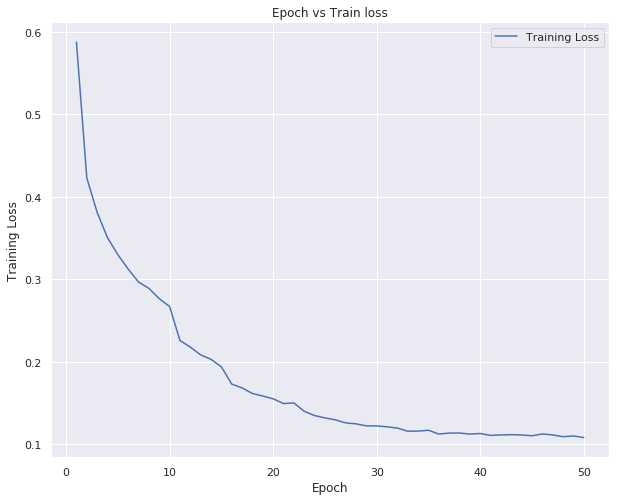

In [123]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df1)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

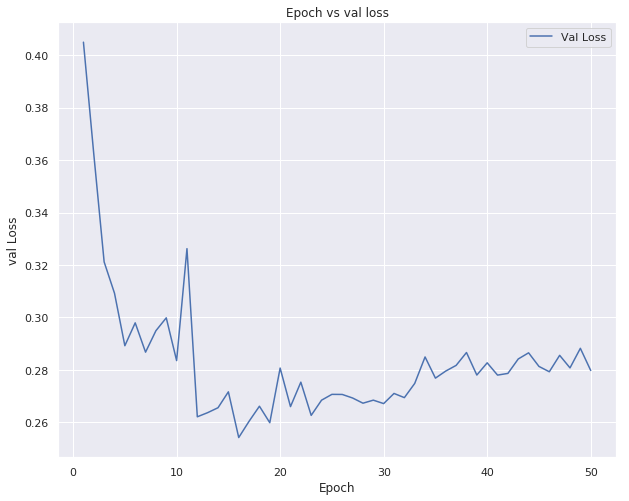

In [124]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df1)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

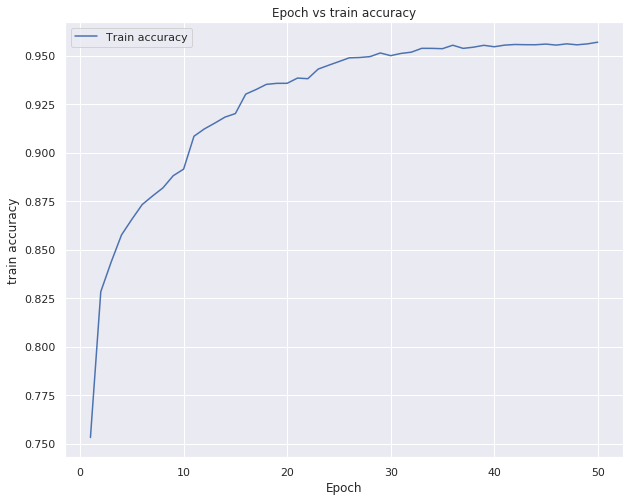

In [125]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df1)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

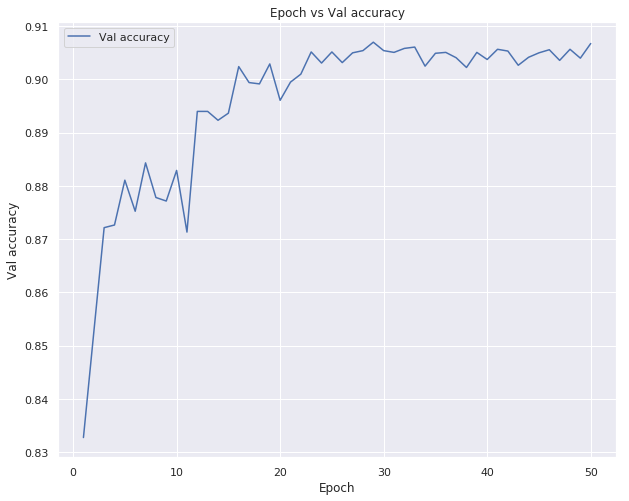

In [126]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df1)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

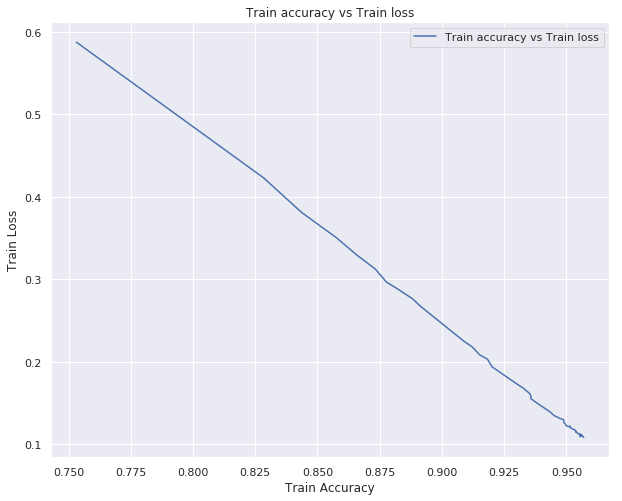

In [127]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df1)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

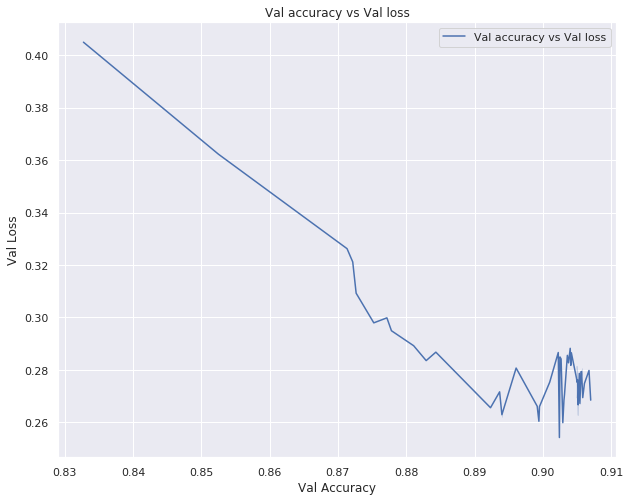

In [128]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df1)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled test data-- 

In [129]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [130]:
df_x_test.shape

(10000, 28, 28, 1)

In [131]:
target_classes1 = model.predict_classes(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 72us/step


In [132]:
target_classes1=pd.DataFrame(target_classes1)

In [133]:
target_classes1

,0
0,3
1,4
2,0
3,1
4,3
...,...
9995,1
9996,1
9997,3
9998,2


In [134]:

target_classes1=pd.DataFrame.reset_index(target_classes1)
target_classes1.columns=['Id','Label']

In [135]:

filename = 'submission_cnn_2.csv'
target_classes1.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_cnn_2.csv


# MODEL 3------ Adam() | BS: 32 | Epoch: 50 | callback | learning_rate_reduction | Dropout 0.50 from 0.25 in last layer


In [138]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.50))
model.add(Dense(5, activation = "softmax"))

# Set a learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)




model.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [139]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)         

In [140]:
import timeit
start=timeit.default_timer()

b=model.fit(x_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 269us/step - loss: 0.6198 - accuracy: 0.7393 - val_loss: 0.4207 - val_accuracy: 0.8307
Epoch 2/50
48000/48000 [==============================] - 13s 270us/step - loss: 0.4507 - accuracy: 0.8181 - val_loss: 0.3528 - val_accuracy: 0.8558
Epoch 3/50
48000/48000 [==============================] - 12s 246us/step - loss: 0.4033 - accuracy: 0.8374 - val_loss: 0.3417 - val_accuracy: 0.8637
Epoch 4/50
48000/48000 [==============================] - 12s 247us/step - loss: 0.3816 - accuracy: 0.8435 - val_loss: 0.3147 - val_accuracy: 0.8733
Epoch 5/50
48000/48000 [==============================] - 12s 259us/step - loss: 0.3596 - accuracy: 0.8530 - val_loss: 0.3284 - val_accuracy: 0.8630
Epoch 6/50
48000/48000 [==============================] - 13s 265us/step - loss: 0.3477 - accuracy: 0.8574 - val_loss: 0.3199 - val_accuracy: 0.8690
Epoch 7/50
48000/48000 [==============================] 

# RESULT -- 
## Epoch 50 | BS: 32 | val acc:0.9020 | val loss: 0.2937 |Time Taken 620

In [142]:
print('Time Taken',stop-start)

Time Taken 620.1422442439944


# PLOTS

In [143]:
b.history

{'val_loss': [0.420704230149587,
  0.3528097349802653,
  0.34165950149297714,
  0.3147022655804952,
  0.3284094855984052,
  0.3198987226287524,
  0.3279208645224571,
  0.2852956078648567,
  0.2830961221953233,
  0.2741285158395767,
  0.27667690148949625,
  0.2683039780159791,
  0.2651724500755469,
  0.289651564737161,
  0.2728308188915253,
  0.2770339111685753,
  0.2790673934320609,
  0.2647982444067796,
  0.2663644605676333,
  0.2821474879980087,
  0.27437577572464944,
  0.2686238294144471,
  0.26407817607124645,
  0.26980968210101125,
  0.2756925190289815,
  0.2692309713661671,
  0.27044712286194167,
  0.2821410552561283,
  0.27149602221449215,
  0.2661394811272621,
  0.26876743201414743,
  0.2686658337811629,
  0.2691418149769306,
  0.2721803758641084,
  0.2747886165082455,
  0.2740567866563797,
  0.27562197809418043,
  0.28542200952768326,
  0.27776853120326994,
  0.2724450043340524,
  0.29194701461990674,
  0.3043131754100323,
  0.2842483759969473,
  0.28328181728720664,
  0.29843

In [144]:
print(b.history['accuracy'])
print(b.history['loss'])
print(b.history['val_accuracy'])
print(b.history['val_loss'])

[0.7393125, 0.8180625, 0.837375, 0.8435417, 0.8529792, 0.8574167, 0.86145836, 0.88197917, 0.88825, 0.8912708, 0.89375, 0.898625, 0.9003125, 0.90177083, 0.90479165, 0.9040833, 0.9139583, 0.91822916, 0.9204792, 0.92125, 0.9222083, 0.9233125, 0.9241875, 0.92525, 0.92560416, 0.92789584, 0.9275, 0.9278333, 0.92889583, 0.93485415, 0.93625, 0.9377083, 0.93702084, 0.9381875, 0.93872917, 0.9399375, 0.9427292, 0.942125, 0.94397914, 0.94222915, 0.944875, 0.9454375, 0.9459375, 0.94622916, 0.94710416, 0.946125, 0.9485625, 0.94610417, 0.94622916, 0.94741666]
[0.6198239645759265, 0.45066088047623637, 0.4032774020234744, 0.38159142643709976, 0.35958540655175847, 0.34769063084820906, 0.33629505487779776, 0.28984543968737125, 0.2749700950210293, 0.2671547036767006, 0.2607852116078138, 0.24947862733403842, 0.24722854021191598, 0.24158426875869432, 0.2334781488031149, 0.23292316563924154, 0.21000945744415125, 0.2027447004268567, 0.19858468641340732, 0.1958809736619393, 0.1909573781217138, 0.18977259553968

### Making dataframe

In [145]:
train_acc_1=b.history['accuracy']
train_loss_1=b.history['loss']
val_acc_1=b.history['val_accuracy']
val_loss_1=b.history['val_loss']

num=len(b.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [146]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [147]:
history_df2=pd.DataFrame(eplist,columns = ['Epoch'])
history_df2['train_acc']=pd.DataFrame(train_acc_1)

In [148]:
history_df2['train_loss']=pd.DataFrame(train_loss_1)
history_df2['val_acc']=pd.DataFrame(val_acc_1)
history_df2['val_loss']=pd.DataFrame(val_loss_1)

In [149]:
history_df2

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.739313,0.619824,0.830750,0.420704
1,2,0.818062,0.450661,0.855750,0.352810
2,3,0.837375,0.403277,0.863667,0.341660
3,4,0.843542,0.381591,0.873250,0.314702
4,5,0.852979,0.359585,0.863000,0.328409
5,6,0.857417,0.347691,0.869000,0.319899
6,7,0.861458,0.336295,0.862583,0.327921
7,8,0.881979,0.289845,0.882917,0.285296
8,9,0.888250,0.274970,0.884417,0.283096
9,10,0.891271,0.267155,0.890417,0.274129


### Epoch vs Train loss

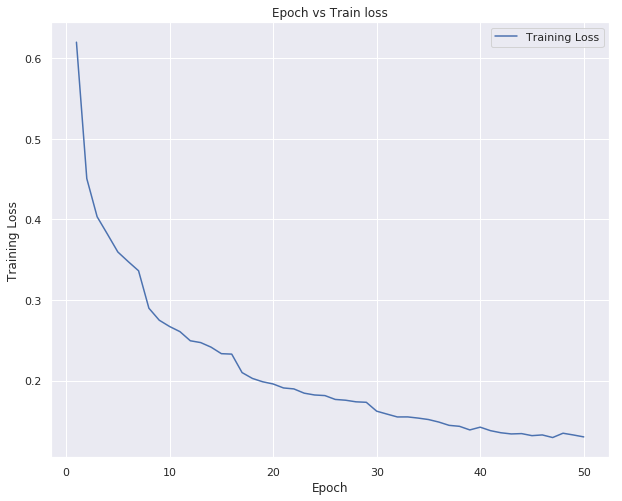

In [150]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df2)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

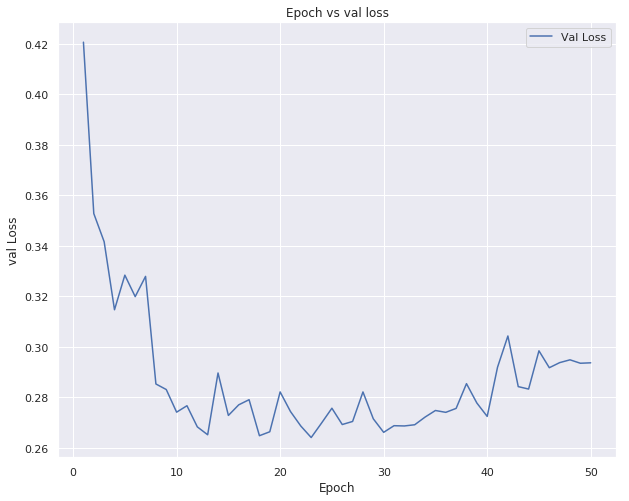

In [151]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df2)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

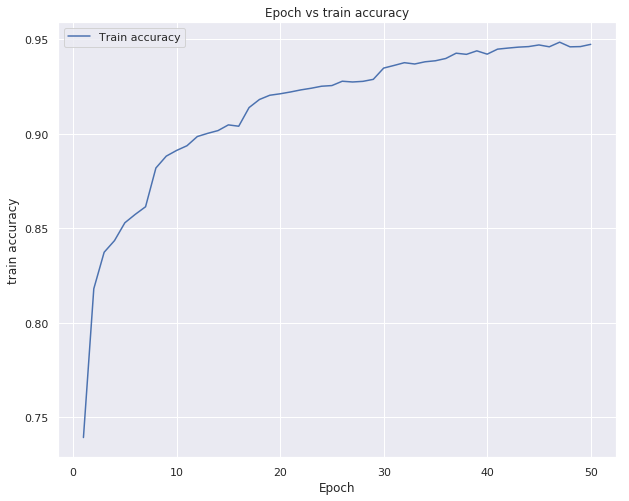

In [152]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df2)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

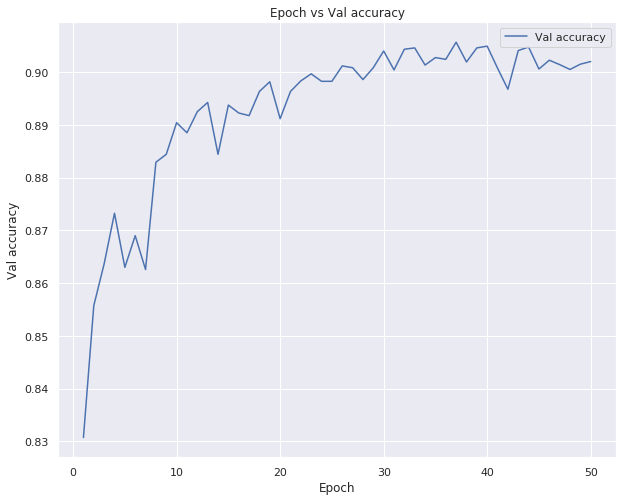

In [153]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df2)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

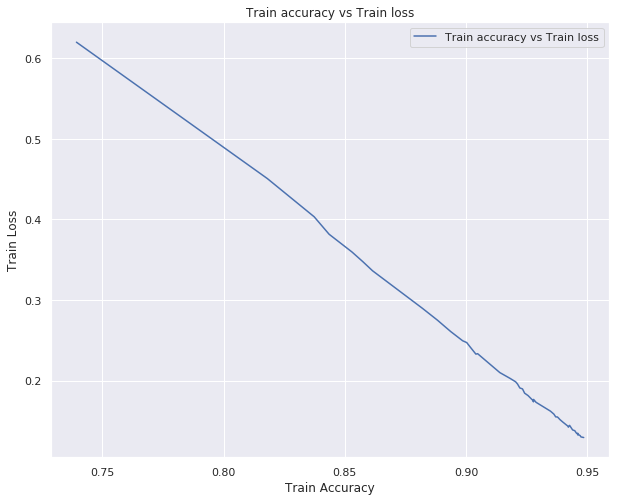

In [154]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df2)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

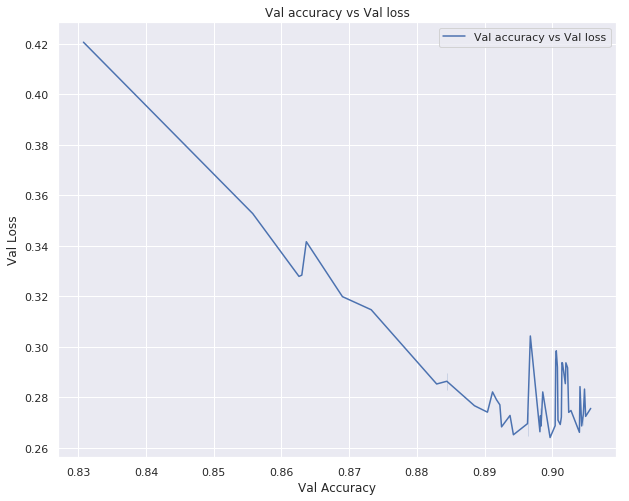

In [155]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df2)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled test data-- 

In [156]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [157]:
df_x_test.shape

(10000, 28, 28, 1)

In [158]:
target_classes2 = model.predict_classes(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 66us/step


In [159]:
target_classes2=pd.DataFrame(target_classes2)

In [160]:
target_classes2

,0
0,3
1,4
2,0
3,1
4,0
...,...
9995,1
9996,1
9997,3
9998,2


In [161]:

target_classes2=pd.DataFrame.reset_index(target_classes2)
target_classes2.columns=['Id','Label']

In [162]:

filename = 'submission_cnn_3.csv'
target_classes2.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_cnn_3.csv


# Model 4-- Adam() | BS: 32 | Epoch: 50 | LeakyReLU | callback | learning_rate_reduction | Dropout 0.25 

In [166]:
from keras.layers.advanced_activations import LeakyReLU

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(5, activation = "softmax"))

# Set a learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

model.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [167]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)        

In [168]:
import timeit
start=timeit.default_timer()

d=model.fit(x_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 264us/step - loss: 0.5947 - accuracy: 0.7515 - val_loss: 0.4014 - val_accuracy: 0.8402
Epoch 2/50
48000/48000 [==============================] - 12s 252us/step - loss: 0.4295 - accuracy: 0.8241 - val_loss: 0.3439 - val_accuracy: 0.8648
Epoch 3/50
48000/48000 [==============================] - 12s 249us/step - loss: 0.3837 - accuracy: 0.8443 - val_loss: 0.3290 - val_accuracy: 0.8694
Epoch 4/50
48000/48000 [==============================] - 12s 248us/step - loss: 0.3536 - accuracy: 0.8554 - val_loss: 0.3172 - val_accuracy: 0.8695
Epoch 5/50
48000/48000 [==============================] - 14s 284us/step - loss: 0.3352 - accuracy: 0.8630 - val_loss: 0.3238 - val_accuracy: 0.8669
Epoch 6/50
48000/48000 [==============================] - 12s 247us/step - loss: 0.3195 - accuracy: 0.8695 - val_loss: 0.3130 - val_accuracy: 0.8698
Epoch 7/50
48000/48000 [==============================] 

# RESULT -- 
## Epoch 50 | BS: 32 | val acc: 0.9048 | val loss: 0.3230 |Time Taken 618.72

In [170]:
print('Time Taken',stop-start)

Time Taken 618.7266924010037


# PLOTS

In [171]:
d.history

{'val_loss': [0.40140272756417594,
  0.3438794554869334,
  0.3289550891717275,
  0.3171879017353058,
  0.3237962096532186,
  0.31304719801743824,
  0.30762354801098507,
  0.3311451016664505,
  0.28144647415479024,
  0.32753155064582823,
  0.28702703803777696,
  0.2926557224392891,
  0.29018285913268727,
  0.28813055682182315,
  0.2749673169453939,
  0.26828737172484396,
  0.2797480848232905,
  0.28833124188085396,
  0.28915773823857305,
  0.3508129086792469,
  0.33634506921221813,
  0.3551218325694402,
  0.2981909361730019,
  0.2891060625612736,
  0.30596917972465354,
  0.291013450011611,
  0.3040497359285752,
  0.3081148232966661,
  0.295735351609687,
  0.30457193483660616,
  0.3068413434724013,
  0.3161719426674147,
  0.3172228018467625,
  0.3185229495887955,
  0.31343701964616777,
  0.31846987555300194,
  0.3165133738915126,
  0.312118430826813,
  0.31642261960046986,
  0.31714777079969647,
  0.3174485760765771,
  0.3179589900535842,
  0.3345127499798934,
  0.32089415709426006,
  0.

In [172]:
print(d.history['accuracy'])
print(d.history['loss'])
print(d.history['val_accuracy'])
print(d.history['val_loss'])

[0.75147915, 0.8240625, 0.84425, 0.8553542, 0.86304164, 0.86952084, 0.87504166, 0.87972915, 0.88527083, 0.89066666, 0.89385414, 0.895875, 0.91197914, 0.9175208, 0.92170835, 0.9210625, 0.92602086, 0.92725, 0.9299167, 0.9306667, 0.93441665, 0.93454164, 0.94460416, 0.9453125, 0.9483542, 0.94885415, 0.9492292, 0.9493333, 0.94972914, 0.95385414, 0.9520625, 0.9539375, 0.9555, 0.9565833, 0.9585, 0.9595417, 0.9613542, 0.9632292, 0.9621458, 0.9642083, 0.96372914, 0.964625, 0.9657083, 0.96752083, 0.9673542, 0.96695834, 0.9690833, 0.96785414, 0.9663542, 0.96835417]
[0.5946955990592638, 0.42950269673268, 0.3836572680423657, 0.3535504835943381, 0.33519551681975523, 0.31951760439574717, 0.30530323360860345, 0.29155131768186887, 0.2836511336962382, 0.2715185776750247, 0.2602023332441847, 0.2540340124989549, 0.21754977765058478, 0.20452467334891358, 0.1927794873515765, 0.19228500323742628, 0.18047416997452578, 0.1788536549123625, 0.17194194329778353, 0.17122931810344258, 0.16241933691687882, 0.1610239

### Making dataframe

In [173]:
train_acc_1=d.history['accuracy']
train_loss_1=d.history['loss']
val_acc_1=d.history['val_accuracy']
val_loss_1=d.history['val_loss']

num=len(d.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [174]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [175]:
history_df5=pd.DataFrame(eplist,columns = ['Epoch'])
history_df5['train_acc']=pd.DataFrame(train_acc_1)

In [176]:
history_df5['train_loss']=pd.DataFrame(train_loss_1)
history_df5['val_acc']=pd.DataFrame(val_acc_1)
history_df5['val_loss']=pd.DataFrame(val_loss_1)

In [177]:
history_df5

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.751479,0.594696,0.840167,0.401403
1,2,0.824063,0.429503,0.864833,0.343879
2,3,0.844250,0.383657,0.869417,0.328955
3,4,0.855354,0.353550,0.869500,0.317188
4,5,0.863042,0.335196,0.866917,0.323796
5,6,0.869521,0.319518,0.869750,0.313047
6,7,0.875042,0.305303,0.869500,0.307624
7,8,0.879729,0.291551,0.862917,0.331145
8,9,0.885271,0.283651,0.884333,0.281446
9,10,0.890667,0.271519,0.871083,0.327532


### Epoch vs Train loss

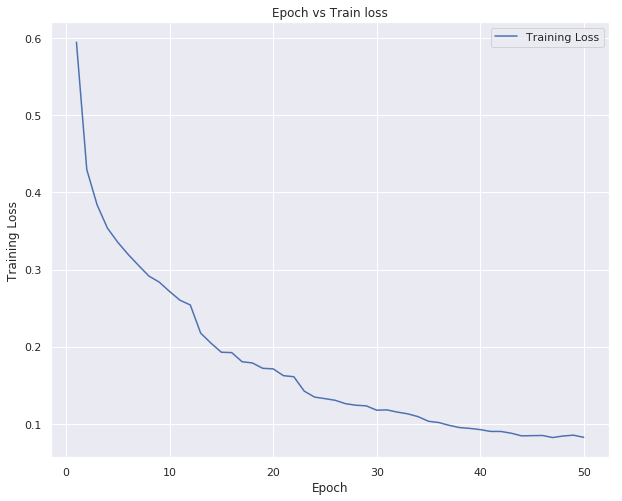

In [178]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df5)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

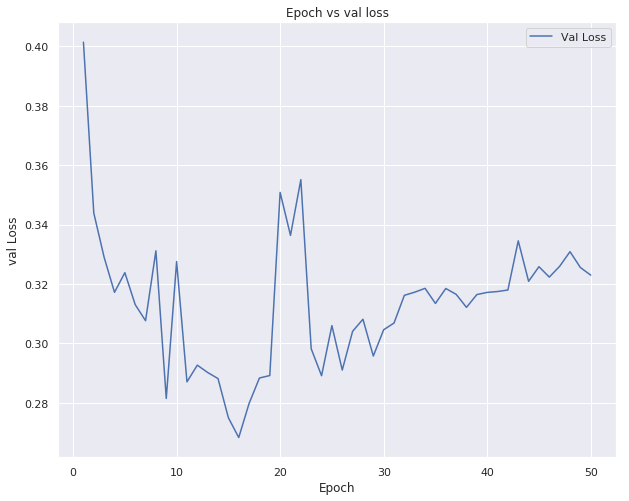

In [179]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df5)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

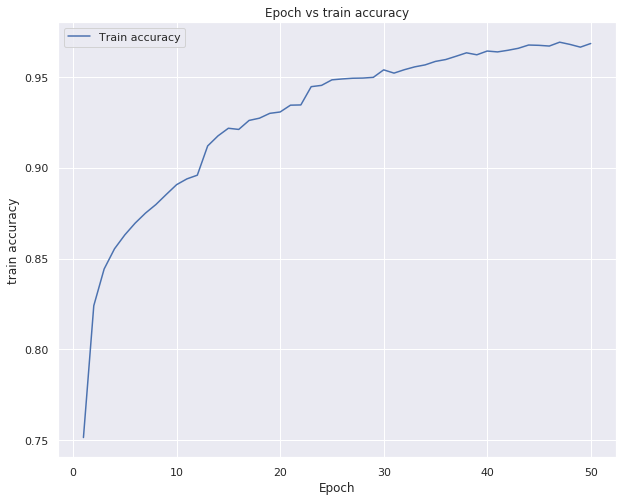

In [180]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df5)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

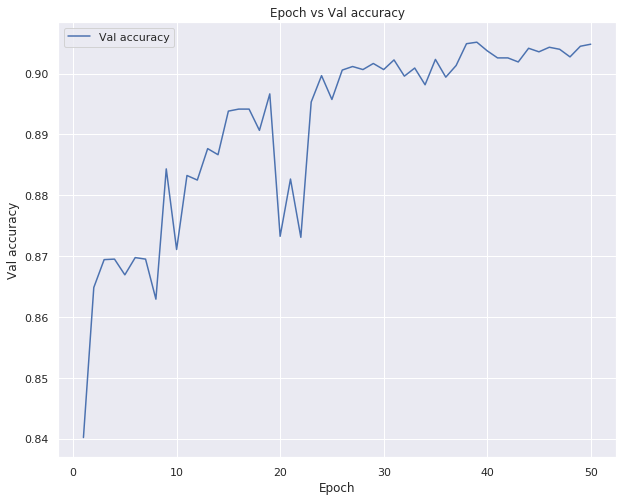

In [181]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df5)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

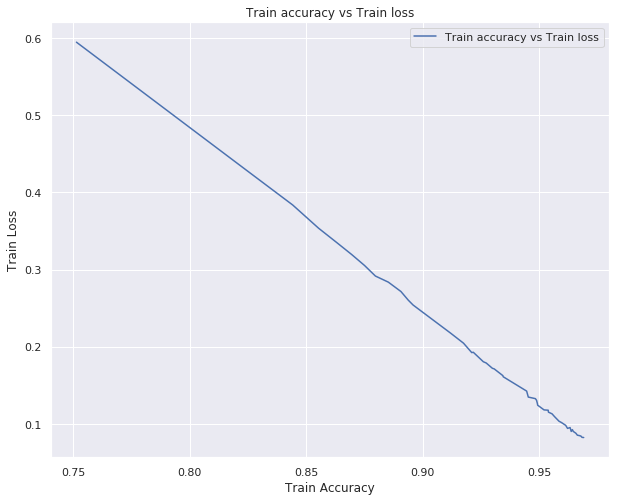

In [182]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df5)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

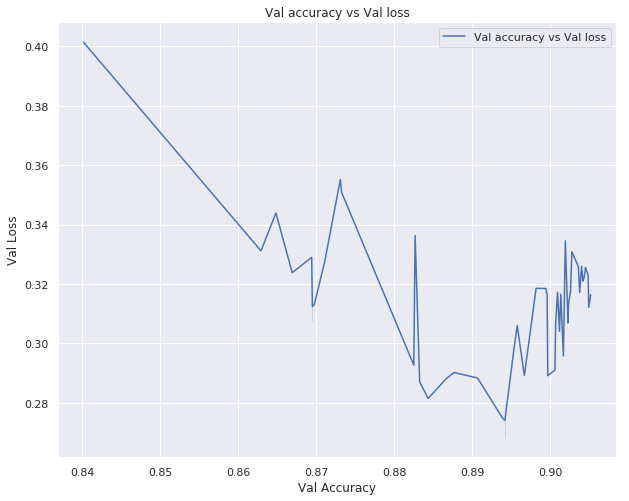

In [183]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df5)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled test data-- 

In [184]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [185]:
df_x_test.shape

(10000, 28, 28, 1)

In [186]:
target_classes4 = model.predict_classes(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 65us/step


In [187]:
target_classes4=pd.DataFrame(target_classes4)

In [188]:
target_classes4

,0
0,3
1,4
2,0
3,1
4,3
...,...
9995,3
9996,1
9997,3
9998,2


In [189]:

target_classes4=pd.DataFrame.reset_index(target_classes4)
target_classes4.columns=['Id','Label']

In [190]:
filename = 'submission_cnn_5.csv'
target_classes4.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_cnn_5.csv


# Model 5-- SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) | BS: 32 | Epoch: 50 | callback | learning_rate_reduction | Dropout 0.25 

In [191]:

    
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(5, activation = "softmax"))

# Set a learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



model.compile(optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [192]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 64)        

In [193]:
import timeit
start=timeit.default_timer()

f=model.fit(x_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 242us/step - loss: 0.6915 - accuracy: 0.7091 - val_loss: 0.5135 - val_accuracy: 0.7938
Epoch 2/50
48000/48000 [==============================] - 11s 227us/step - loss: 0.4740 - accuracy: 0.8094 - val_loss: 0.4391 - val_accuracy: 0.8251
Epoch 3/50
48000/48000 [==============================] - 10s 216us/step - loss: 0.4241 - accuracy: 0.8281 - val_loss: 0.4017 - val_accuracy: 0.8408
Epoch 4/50
48000/48000 [==============================] - 11s 221us/step - loss: 0.3914 - accuracy: 0.8420 - val_loss: 0.3265 - val_accuracy: 0.8737
Epoch 5/50
48000/48000 [==============================] - 11s 226us/step - loss: 0.3684 - accuracy: 0.8490 - val_loss: 0.3169 - val_accuracy: 0.8718
Epoch 6/50
48000/48000 [==============================] - 11s 220us/step - loss: 0.3496 - accuracy: 0.8589 - val_loss: 0.3027 - val_accuracy: 0.8812
Epoch 7/50
48000/48000 [==============================] 

# RESULT -- 
## Epoch 50 | BS: 32 | val acc: 0.9078 | val loss: 0.2696  |Time Taken 534.0414721150009







In [195]:
print('Time Taken',stop-start)

Time Taken 534.0414721150009


# PLOTS

In [196]:
f.history

{'val_loss': [0.5134511111179988,
  0.43908892248074216,
  0.4016650872031848,
  0.32647710653146106,
  0.3169163802067439,
  0.30271614746252695,
  0.30372151178121565,
  0.2956760945816835,
  0.2897112887899081,
  0.3097947241266569,
  0.2811948150197665,
  0.2904799457391103,
  0.28258084499835967,
  0.2871199888090293,
  0.2686398169199626,
  0.2739343785941601,
  0.267574149419864,
  0.2822745027740796,
  0.302977454851071,
  0.2588947259783745,
  0.2716675976117452,
  0.26909499044219654,
  0.2650101819634438,
  0.2591772923866908,
  0.25846658315261206,
  0.2682150433162848,
  0.25575204425056774,
  0.2557104962865512,
  0.25756138902902603,
  0.263353886321187,
  0.2629524713754654,
  0.2627967438995838,
  0.26395918433368204,
  0.2587547624607881,
  0.2626559224625429,
  0.2654348725527525,
  0.26003256047765416,
  0.26098748358587426,
  0.26064534636338554,
  0.26533081895609695,
  0.2694707550158103,
  0.26552602005998294,
  0.2662007102916638,
  0.27102507157127065,
  0.263

In [197]:
print(f.history['accuracy'])
print(f.history['loss'])
print(f.history['val_accuracy'])
print(f.history['val_loss'])

[0.7090625, 0.8094375, 0.828125, 0.8420208, 0.849, 0.85891664, 0.86560416, 0.86560416, 0.8709792, 0.87560415, 0.8796667, 0.88210416, 0.8830625, 0.88783336, 0.90420836, 0.90791667, 0.9093125, 0.91175, 0.9135208, 0.9156042, 0.9165, 0.91825, 0.9203125, 0.9270625, 0.93025, 0.93116665, 0.9346875, 0.93622917, 0.9355625, 0.9368333, 0.938375, 0.9388958, 0.9438125, 0.9441875, 0.9449792, 0.946, 0.94675, 0.94989586, 0.94939584, 0.9507292, 0.9500625, 0.9513958, 0.95025, 0.95285416, 0.952375, 0.9533542, 0.9528958, 0.95327085, 0.9543125, 0.9530208]
[0.6914984242419402, 0.4739609150985877, 0.42414408086737, 0.3914440007011096, 0.3684235732058684, 0.34957085440059504, 0.33444238546987376, 0.3250577509055535, 0.3166414491832256, 0.3027917957852284, 0.2987035958096385, 0.29176375167568525, 0.28227176510790986, 0.2767006910517812, 0.23576788202673196, 0.22717769306898117, 0.22191402430832385, 0.21589106393232943, 0.21334045943866173, 0.20895729319627088, 0.20522668621937434, 0.20007968660319844, 0.195933

### Making dataframe

In [198]:
train_acc_1=f.history['accuracy']
train_loss_1=f.history['loss']
val_acc_1=f.history['val_accuracy']
val_loss_1=f.history['val_loss']

num=len(f.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [199]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [200]:
history_df6=pd.DataFrame(eplist,columns = ['Epoch'])
history_df6['train_acc']=pd.DataFrame(train_acc_1)

In [201]:
history_df6['train_loss']=pd.DataFrame(train_loss_1)
history_df6['val_acc']=pd.DataFrame(val_acc_1)
history_df6['val_loss']=pd.DataFrame(val_loss_1)

In [202]:
history_df6

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.709063,0.691498,0.793833,0.513451
1,2,0.809438,0.473961,0.825083,0.439089
2,3,0.828125,0.424144,0.840833,0.401665
3,4,0.842021,0.391444,0.873667,0.326477
4,5,0.849000,0.368424,0.871833,0.316916
5,6,0.858917,0.349571,0.881167,0.302716
6,7,0.865604,0.334442,0.875000,0.303722
7,8,0.865604,0.325058,0.879583,0.295676
8,9,0.870979,0.316641,0.885167,0.289711
9,10,0.875604,0.302792,0.873250,0.309795


### Epoch vs Train loss

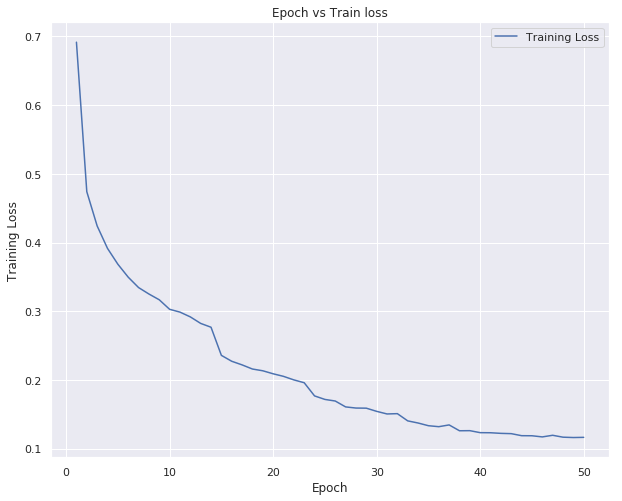

In [203]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df6)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

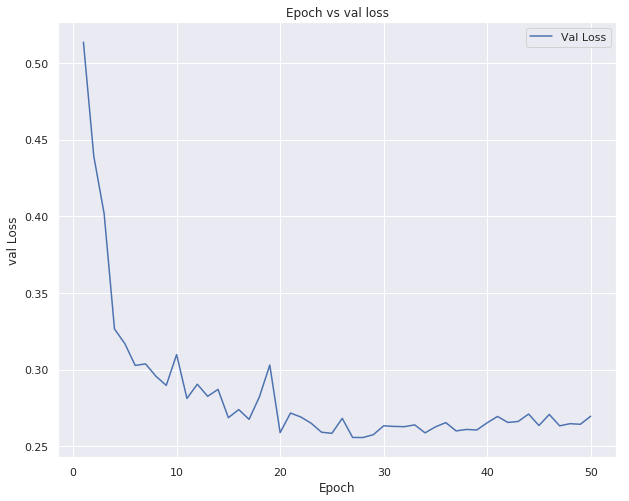

In [204]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df6)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

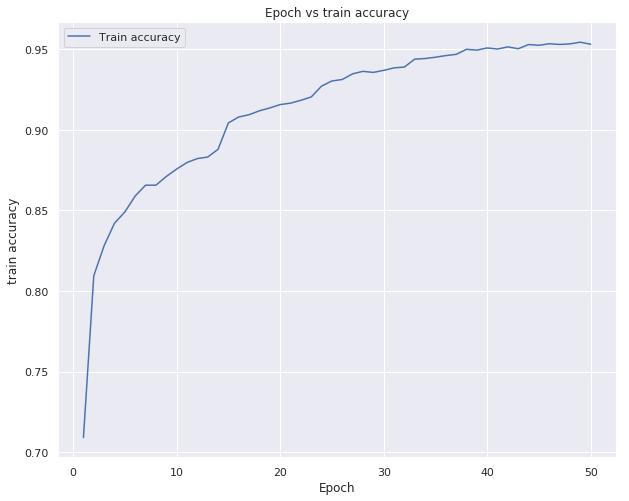

In [205]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df6)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

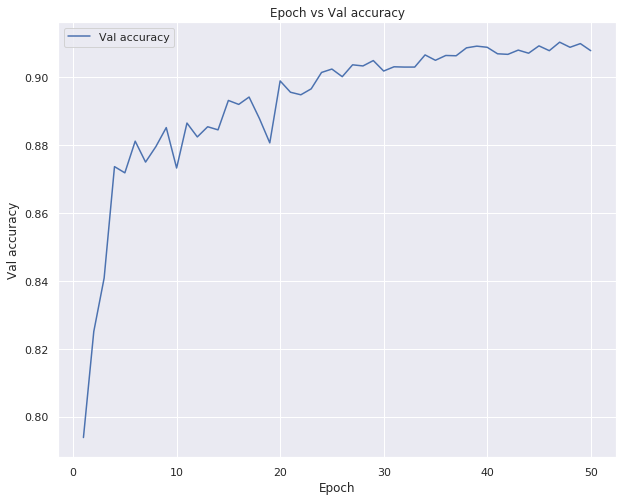

In [206]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df6)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

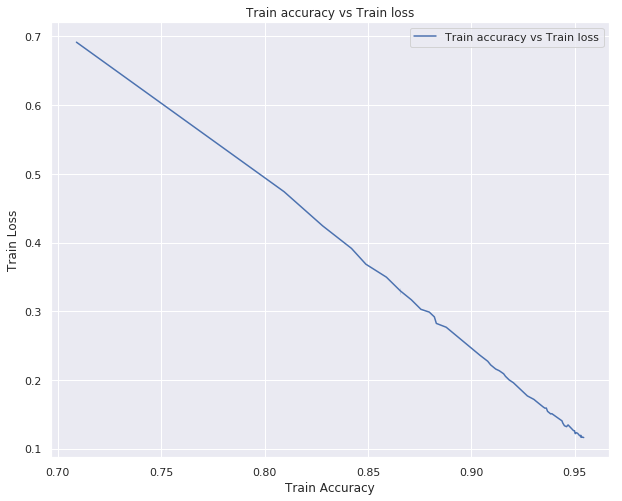

In [207]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df6)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

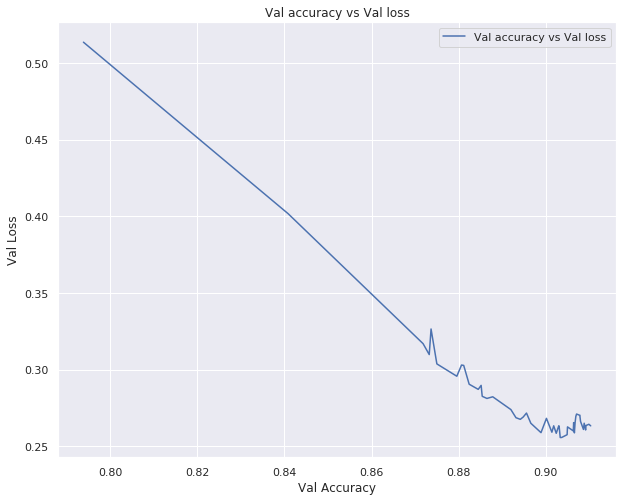

In [208]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df6)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled test data-- 

In [209]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [210]:
df_x_test.shape

(10000, 28, 28, 1)

In [211]:
target_classes5 = model.predict_classes(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 64us/step


In [212]:
target_classes5=pd.DataFrame(target_classes5)

In [213]:
target_classes5

,0
0,3
1,4
2,0
3,1
4,1
...,...
9995,1
9996,1
9997,3
9998,2


In [214]:

target_classes5=pd.DataFrame.reset_index(target_classes5)
target_classes5.columns=['Id','Label']

In [215]:
filename = 'submission_cnn_6.csv'
target_classes5.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_cnn_6.csv


# Model 6-- SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) | BS: 128 | Epoch: 50 | LeakyReLU | callback | learning_rate_reduction | Dropout 0.25 

In [216]:

    
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(5, activation = "softmax"))

# Set a learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



model.compile(optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [217]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 64)        

In [218]:
import timeit
start=timeit.default_timer()

f=model.fit(x_train,y_train,batch_size = 128,epochs = 50,verbose=1,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 101us/step - loss: 0.8573 - accuracy: 0.6317 - val_loss: 0.5840 - val_accuracy: 0.7685
Epoch 2/50
48000/48000 [==============================] - 4s 86us/step - loss: 0.5868 - accuracy: 0.7631 - val_loss: 0.4707 - val_accuracy: 0.8282
Epoch 3/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.4936 - accuracy: 0.8030 - val_loss: 0.4111 - val_accuracy: 0.8435
Epoch 4/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.4474 - accuracy: 0.8206 - val_loss: 0.3728 - val_accuracy: 0.8572
Epoch 5/50
48000/48000 [==============================] - 4s 83us/step - loss: 0.4181 - accuracy: 0.8335 - val_loss: 0.3599 - val_accuracy: 0.8667
Epoch 6/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.3931 - accuracy: 0.8426 - val_loss: 0.3456 - val_accuracy: 0.8633
Epoch 7/50
48000/48000 [==============================] - 4s 84us/s

# RESULT -- 
## Epoch 50 | BS: 32 | val acc: 0.9073 | val loss: 0.2311  |Time Taken 201







In [220]:
print('Time Taken',stop-start)

Time Taken 201.29215921900322


# PLOTS

In [221]:
f.history

{'val_loss': [0.5840231631596883,
  0.47068621667226157,
  0.41109649173418683,
  0.37279203271865846,
  0.3598672552903493,
  0.3456436253388723,
  0.31928895942370095,
  0.3093480136394501,
  0.3001881302992503,
  0.30039042099316915,
  0.2916923146247864,
  0.29893515348434446,
  0.2809065813223521,
  0.2847419586976369,
  0.28009965467453,
  0.27504813639322917,
  0.2621294359366099,
  0.256375550587972,
  0.2618649906317393,
  0.25600066836675006,
  0.2548042636712392,
  0.24963893965880077,
  0.26132636483510335,
  0.25078815229733786,
  0.25128272314866384,
  0.24215743664900463,
  0.24111537992954254,
  0.24151362450917563,
  0.24436553406715394,
  0.2410408887863159,
  0.24964120225111644,
  0.2345015076001485,
  0.23507035263379414,
  0.2343162521123886,
  0.2337939076423645,
  0.23623104786872864,
  0.23572067026297253,
  0.23604234166940052,
  0.23609469600518546,
  0.23481503125031788,
  0.23759166610240937,
  0.23573929520448048,
  0.23456419789791108,
  0.235034661650657

In [222]:
print(f.history['accuracy'])
print(f.history['loss'])
print(f.history['val_accuracy'])
print(f.history['val_loss'])

[0.63166666, 0.76310414, 0.8029792, 0.82060415, 0.83347917, 0.8425625, 0.84741664, 0.8551667, 0.85933334, 0.8631458, 0.8677292, 0.86952084, 0.87410414, 0.87591666, 0.88004166, 0.8815, 0.890625, 0.892625, 0.8964583, 0.8974375, 0.89764583, 0.9005, 0.90154165, 0.899, 0.901125, 0.9072292, 0.90902084, 0.90947914, 0.911, 0.9096875, 0.91141665, 0.91216666, 0.91479164, 0.91570836, 0.9166667, 0.9155833, 0.9169375, 0.9183958, 0.918125, 0.9187083, 0.9203542, 0.9186042, 0.921, 0.91966665, 0.9214375, 0.9204792, 0.9205833, 0.9209167, 0.9228125, 0.9200208]
[0.857252676486969, 0.5868308917681376, 0.49358292285601296, 0.44740203404426576, 0.4180846808751424, 0.39311780003706615, 0.37791163523991905, 0.36243650285402934, 0.3474037735462189, 0.3406241174141566, 0.3282882765134176, 0.3230167731444041, 0.3109678058624268, 0.3037016495466232, 0.298375484029452, 0.2915655936002731, 0.2695551815430323, 0.26218959494431815, 0.25586001853148144, 0.2551553278764089, 0.2545880641142527, 0.2467126882870992, 0.2456

### Making dataframe

In [223]:
train_acc_1=f.history['accuracy']
train_loss_1=f.history['loss']
val_acc_1=f.history['val_accuracy']
val_loss_1=f.history['val_loss']

num=len(f.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [224]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [225]:
history_df6=pd.DataFrame(eplist,columns = ['Epoch'])
history_df6['train_acc']=pd.DataFrame(train_acc_1)

In [226]:
history_df6['train_loss']=pd.DataFrame(train_loss_1)
history_df6['val_acc']=pd.DataFrame(val_acc_1)
history_df6['val_loss']=pd.DataFrame(val_loss_1)

In [227]:
history_df6

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.631667,0.857253,0.768500,0.584023
1,2,0.763104,0.586831,0.828250,0.470686
2,3,0.802979,0.493583,0.843500,0.411096
3,4,0.820604,0.447402,0.857250,0.372792
4,5,0.833479,0.418085,0.866667,0.359867
5,6,0.842562,0.393118,0.863333,0.345644
6,7,0.847417,0.377912,0.874417,0.319289
7,8,0.855167,0.362437,0.879333,0.309348
8,9,0.859333,0.347404,0.884250,0.300188
9,10,0.863146,0.340624,0.883083,0.300390


### Epoch vs Train loss

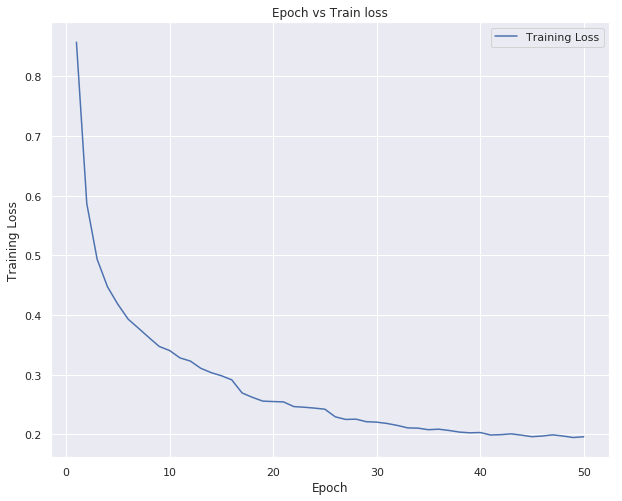

In [228]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df6)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

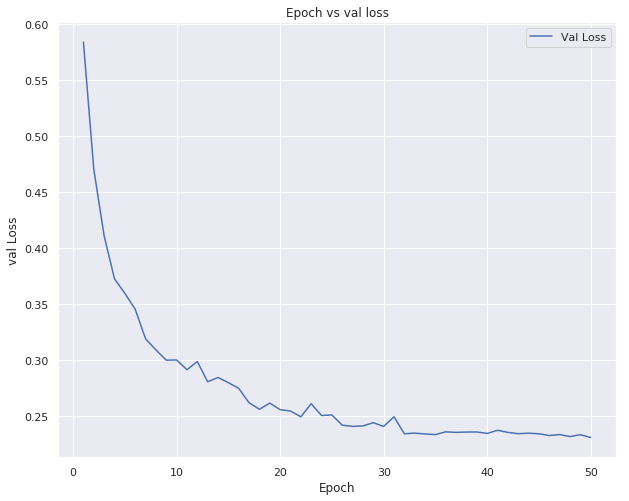

In [229]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df6)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

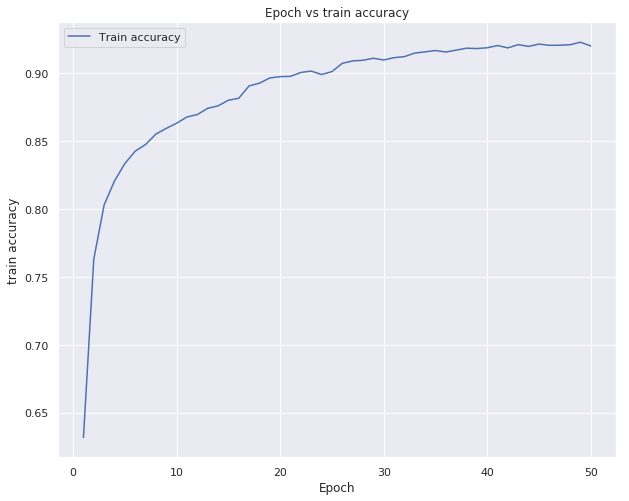

In [230]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df6)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

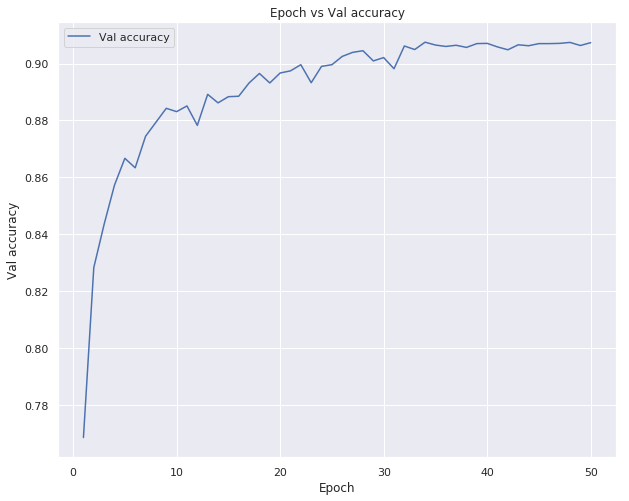

In [231]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df6)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

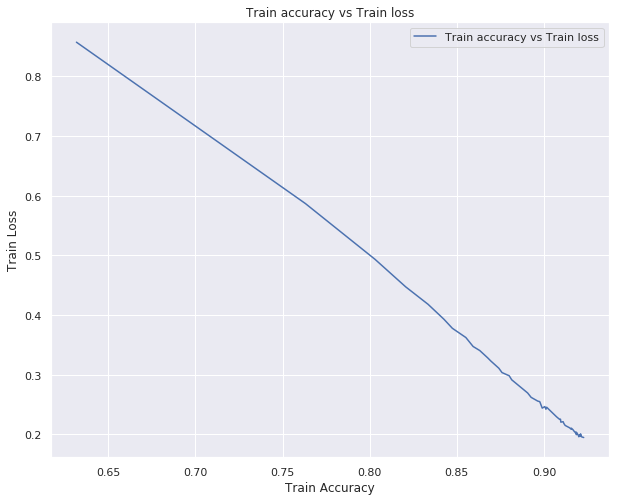

In [232]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df6)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

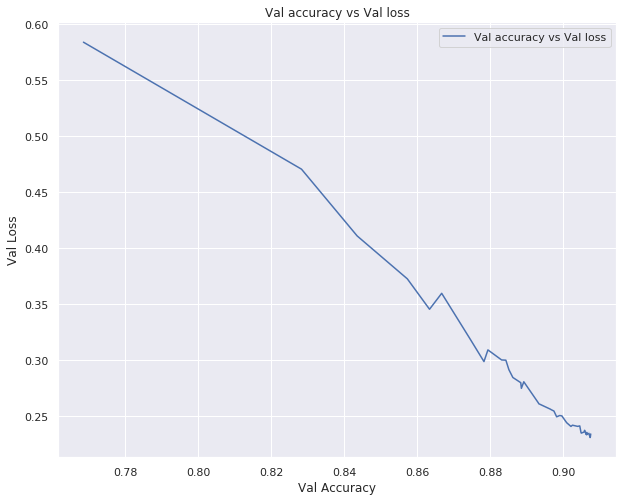

In [233]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df6)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled test data-- 

In [234]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [235]:
df_x_test.shape

(10000, 28, 28, 1)

In [239]:
target_classes6 = model.predict_classes(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 69us/step


In [240]:
target_classes6=pd.DataFrame(target_classes6)

In [241]:
target_classes6

,0
0,4
1,4
2,0
3,1
4,1
...,...
9995,1
9996,1
9997,3
9998,2


In [242]:

target_classes6=pd.DataFrame.reset_index(target_classes6)
target_classes6.columns=['Id','Label']

In [243]:
filename = 'submission_cnn_7.csv'
target_classes6.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_cnn_7.csv


# Model 7-- SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) | BS: 32 | Epoch: 50 | callback | learning_rate_reduction | Dropout 0.25 | Batch Normalizer()

In [248]:

    
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(5, activation = "softmax"))

# Set a learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



model.compile(optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [249]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 14, 14, 64)      

In [250]:
import timeit
start=timeit.default_timer()

h=model.fit(x_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 398us/step - loss: 0.6221 - accuracy: 0.7480 - val_loss: 0.4697 - val_accuracy: 0.8053
Epoch 2/50
48000/48000 [==============================] - 19s 400us/step - loss: 0.4855 - accuracy: 0.8015 - val_loss: 0.4411 - val_accuracy: 0.8094
Epoch 3/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.4321 - accuracy: 0.8238 - val_loss: 0.3615 - val_accuracy: 0.8546
Epoch 4/50
48000/48000 [==============================] - 18s 377us/step - loss: 0.3937 - accuracy: 0.8395 - val_loss: 0.3285 - val_accuracy: 0.8710
Epoch 5/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.3643 - accuracy: 0.8515 - val_loss: 0.3314 - val_accuracy: 0.8649
Epoch 6/50
48000/48000 [==============================] - 19s 386us/step - loss: 0.3452 - accuracy: 0.8610 - val_loss: 0.3114 - val_accuracy: 0.8735
Epoch 7/50
48000/48000 [==============================] 

# RESULT -- 
## Epoch 50 | BS: 32 | val acc: 0.9112 | val loss: 0.2488  |Time Taken 927.5281197939985













In [252]:
print('Time Taken',stop-start)

Time Taken 927.5281197939985


# PLOTS

In [253]:
h.history

{'val_loss': [0.4696664660771688,
  0.44110306942462923,
  0.3614848424196243,
  0.3284909633596738,
  0.3314344249367714,
  0.3114214806954066,
  0.30156101550658543,
  0.33663137821356454,
  0.3214259006480376,
  0.38510455818970996,
  0.2650723709066709,
  0.2678581737180551,
  0.2824288555185,
  0.26006704475482306,
  0.2592081168889999,
  0.263688874065876,
  0.26781821937362355,
  0.2749069741666317,
  0.2708186296224594,
  0.24506372746825217,
  0.25041576970616974,
  0.2511088511149088,
  0.253200945670406,
  0.24805194098254044,
  0.252990028043588,
  0.263533365080754,
  0.2512913969010115,
  0.24615448547403018,
  0.24514105127751828,
  0.2451099025060733,
  0.2469055822690328,
  0.25275425441066424,
  0.24608608595033488,
  0.2446369685580333,
  0.2498328775962194,
  0.25097502260903515,
  0.24818036408722402,
  0.25550949925680955,
  0.24800802790125212,
  0.24940280681848526,
  0.25121192213892934,
  0.2475427046616872,
  0.24637513485054174,
  0.24679363512496152,
  0.24

In [254]:
print(h.history['accuracy'])
print(h.history['loss'])
print(h.history['val_accuracy'])
print(h.history['val_loss'])

[0.748, 0.8015417, 0.82375, 0.8395, 0.8515, 0.861, 0.8678125, 0.87166667, 0.8776875, 0.8825, 0.896125, 0.90066665, 0.9042917, 0.90783334, 0.90964586, 0.9125417, 0.9141875, 0.91610414, 0.919, 0.926625, 0.9291667, 0.93016666, 0.931125, 0.93735415, 0.93720835, 0.93872917, 0.940875, 0.94297916, 0.9434583, 0.9421458, 0.94414586, 0.94529164, 0.9435625, 0.9445417, 0.9470417, 0.94764584, 0.94591665, 0.9472917, 0.9484583, 0.9476875, 0.9483125, 0.94979167, 0.94897914, 0.94975, 0.94808334, 0.95122916, 0.9496667, 0.9496458, 0.9508125, 0.9513958]
[0.6220761320491632, 0.4855353213151296, 0.43206276298562685, 0.3937382977853219, 0.3642744584878286, 0.34516937263806663, 0.3244777505497138, 0.31299456927676994, 0.297640488927563, 0.2859214700286587, 0.2548651880870263, 0.24352081359922886, 0.23537145983676117, 0.22945076271146536, 0.22468759616464376, 0.2151257828846574, 0.21168632685393096, 0.20747777757793665, 0.20147406749924024, 0.18217497198407848, 0.17757974592223763, 0.17287163240338366, 0.17073

### Making dataframe

In [255]:
train_acc_1=h.history['accuracy']
train_loss_1=h.history['loss']
val_acc_1=h.history['val_accuracy']
val_loss_1=h.history['val_loss']

num=len(h.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [256]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [257]:
history_df7=pd.DataFrame(eplist,columns = ['Epoch'])
history_df7['train_acc']=pd.DataFrame(train_acc_1)

In [258]:
history_df7['train_loss']=pd.DataFrame(train_loss_1)
history_df7['val_acc']=pd.DataFrame(val_acc_1)
history_df7['val_loss']=pd.DataFrame(val_loss_1)

In [261]:
history_df7

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.748000,0.622076,0.805333,0.469666
1,2,0.801542,0.485535,0.809417,0.441103
2,3,0.823750,0.432063,0.854583,0.361485
3,4,0.839500,0.393738,0.871000,0.328491
4,5,0.851500,0.364274,0.864917,0.331434
5,6,0.861000,0.345169,0.873500,0.311421
6,7,0.867813,0.324478,0.876167,0.301561
7,8,0.871667,0.312995,0.861500,0.336631
8,9,0.877688,0.297640,0.870917,0.321426
9,10,0.882500,0.285921,0.848250,0.385105


### Epoch vs Train loss

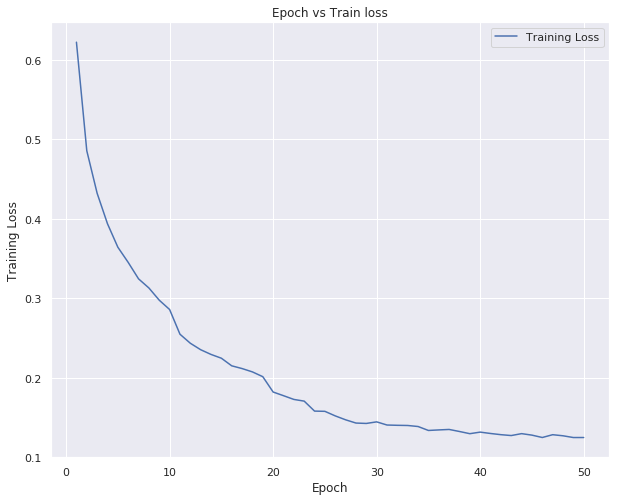

In [262]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df7)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

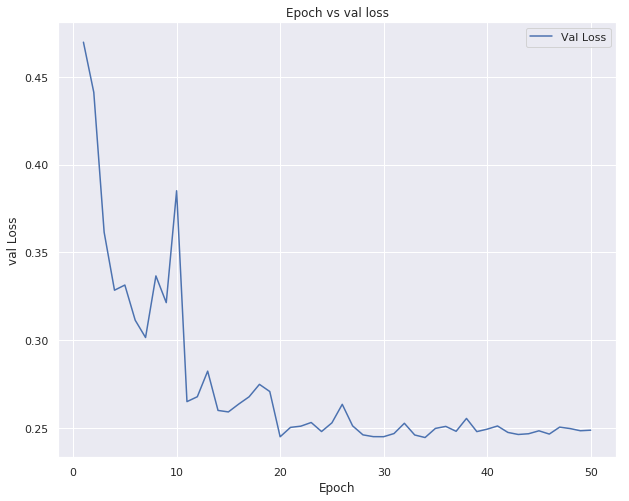

In [263]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df7)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

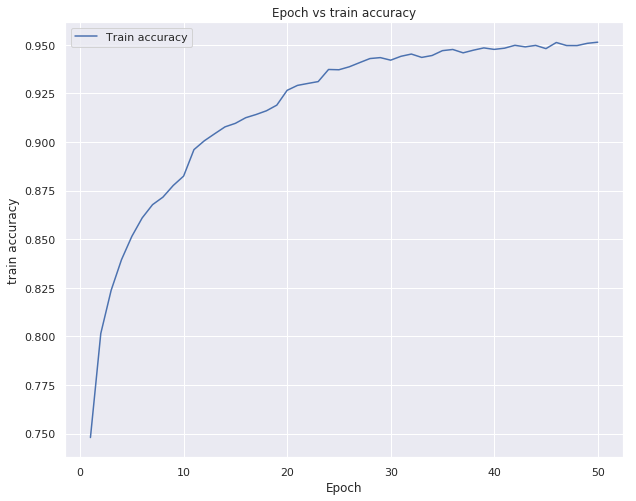

In [264]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df7)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

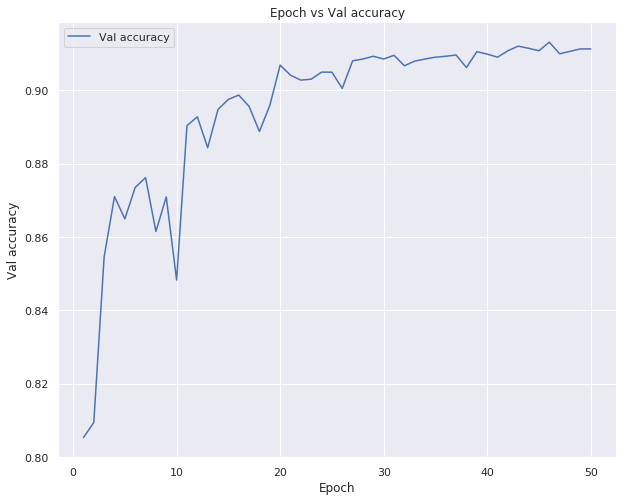

In [265]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df7)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

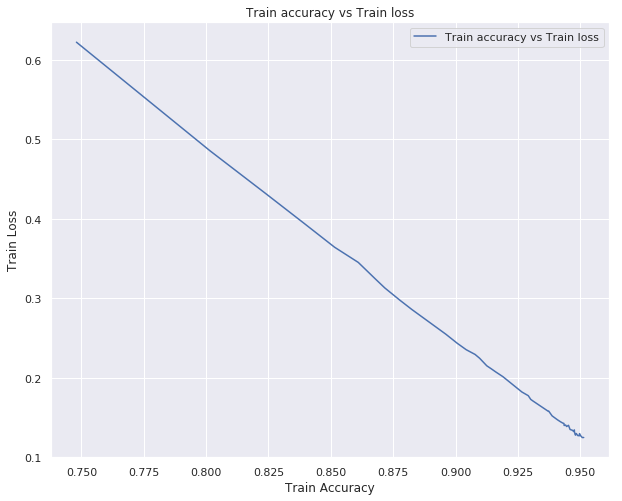

In [266]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df7)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

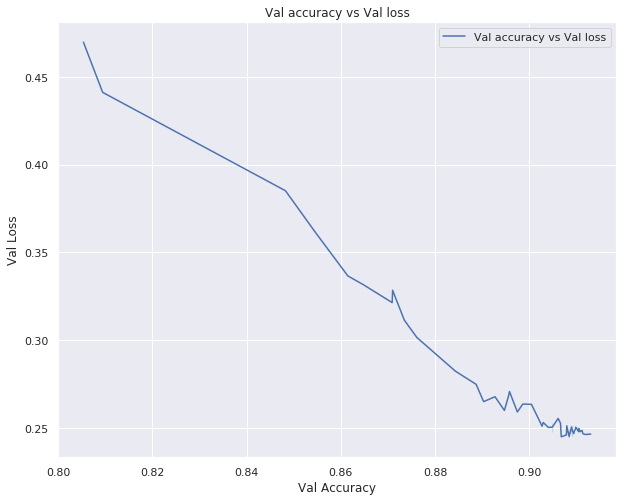

In [267]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df7)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled test data-- 

In [268]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [269]:
df_x_test.shape

(10000, 28, 28, 1)

In [270]:
target_classes9 = model.predict_classes(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 108us/step


In [271]:
target_classes9=pd.DataFrame(target_classes9)

In [272]:
target_classes9

,0
0,3
1,4
2,0
3,1
4,1
...,...
9995,1
9996,1
9997,3
9998,1


In [273]:

target_classes9=pd.DataFrame.reset_index(target_classes9)
target_classes9.columns=['Id','Label']

In [275]:
filename = 'submission_cnn_8.csv'
target_classes9.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_cnn_8.csv
